<a href="https://colab.research.google.com/github/202248SD/5DayGitChallenge/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics

In [ ]:
%pip install roboflow

In [3]:
from shutil import rmtree

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="srcyLGeWIXHSH3HZAiba")
project = rf.workspace("iliescu-mihail-doirn").project("stanford-dogs-dataset-dog-breed")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.48, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Stanford-Dogs-Dataset-dog-breed-1 in yolov8:: 100%|██████████| 40994/40994 [00:08<00:00, 4598.52it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=15 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 496MB/s]
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Stanford-Dogs-Dataset-dog-breed-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [6]:
train_dir = '/content/runs/detect/train/'

In [9]:
!ls {train_dir}

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719976527.6198153e25a9.4343.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4485.jpg  weights
P_curve.png					    train_batch4486.jpg
PR_curve.png					    train_batch4487.jpg


In [10]:
from PIL import Image

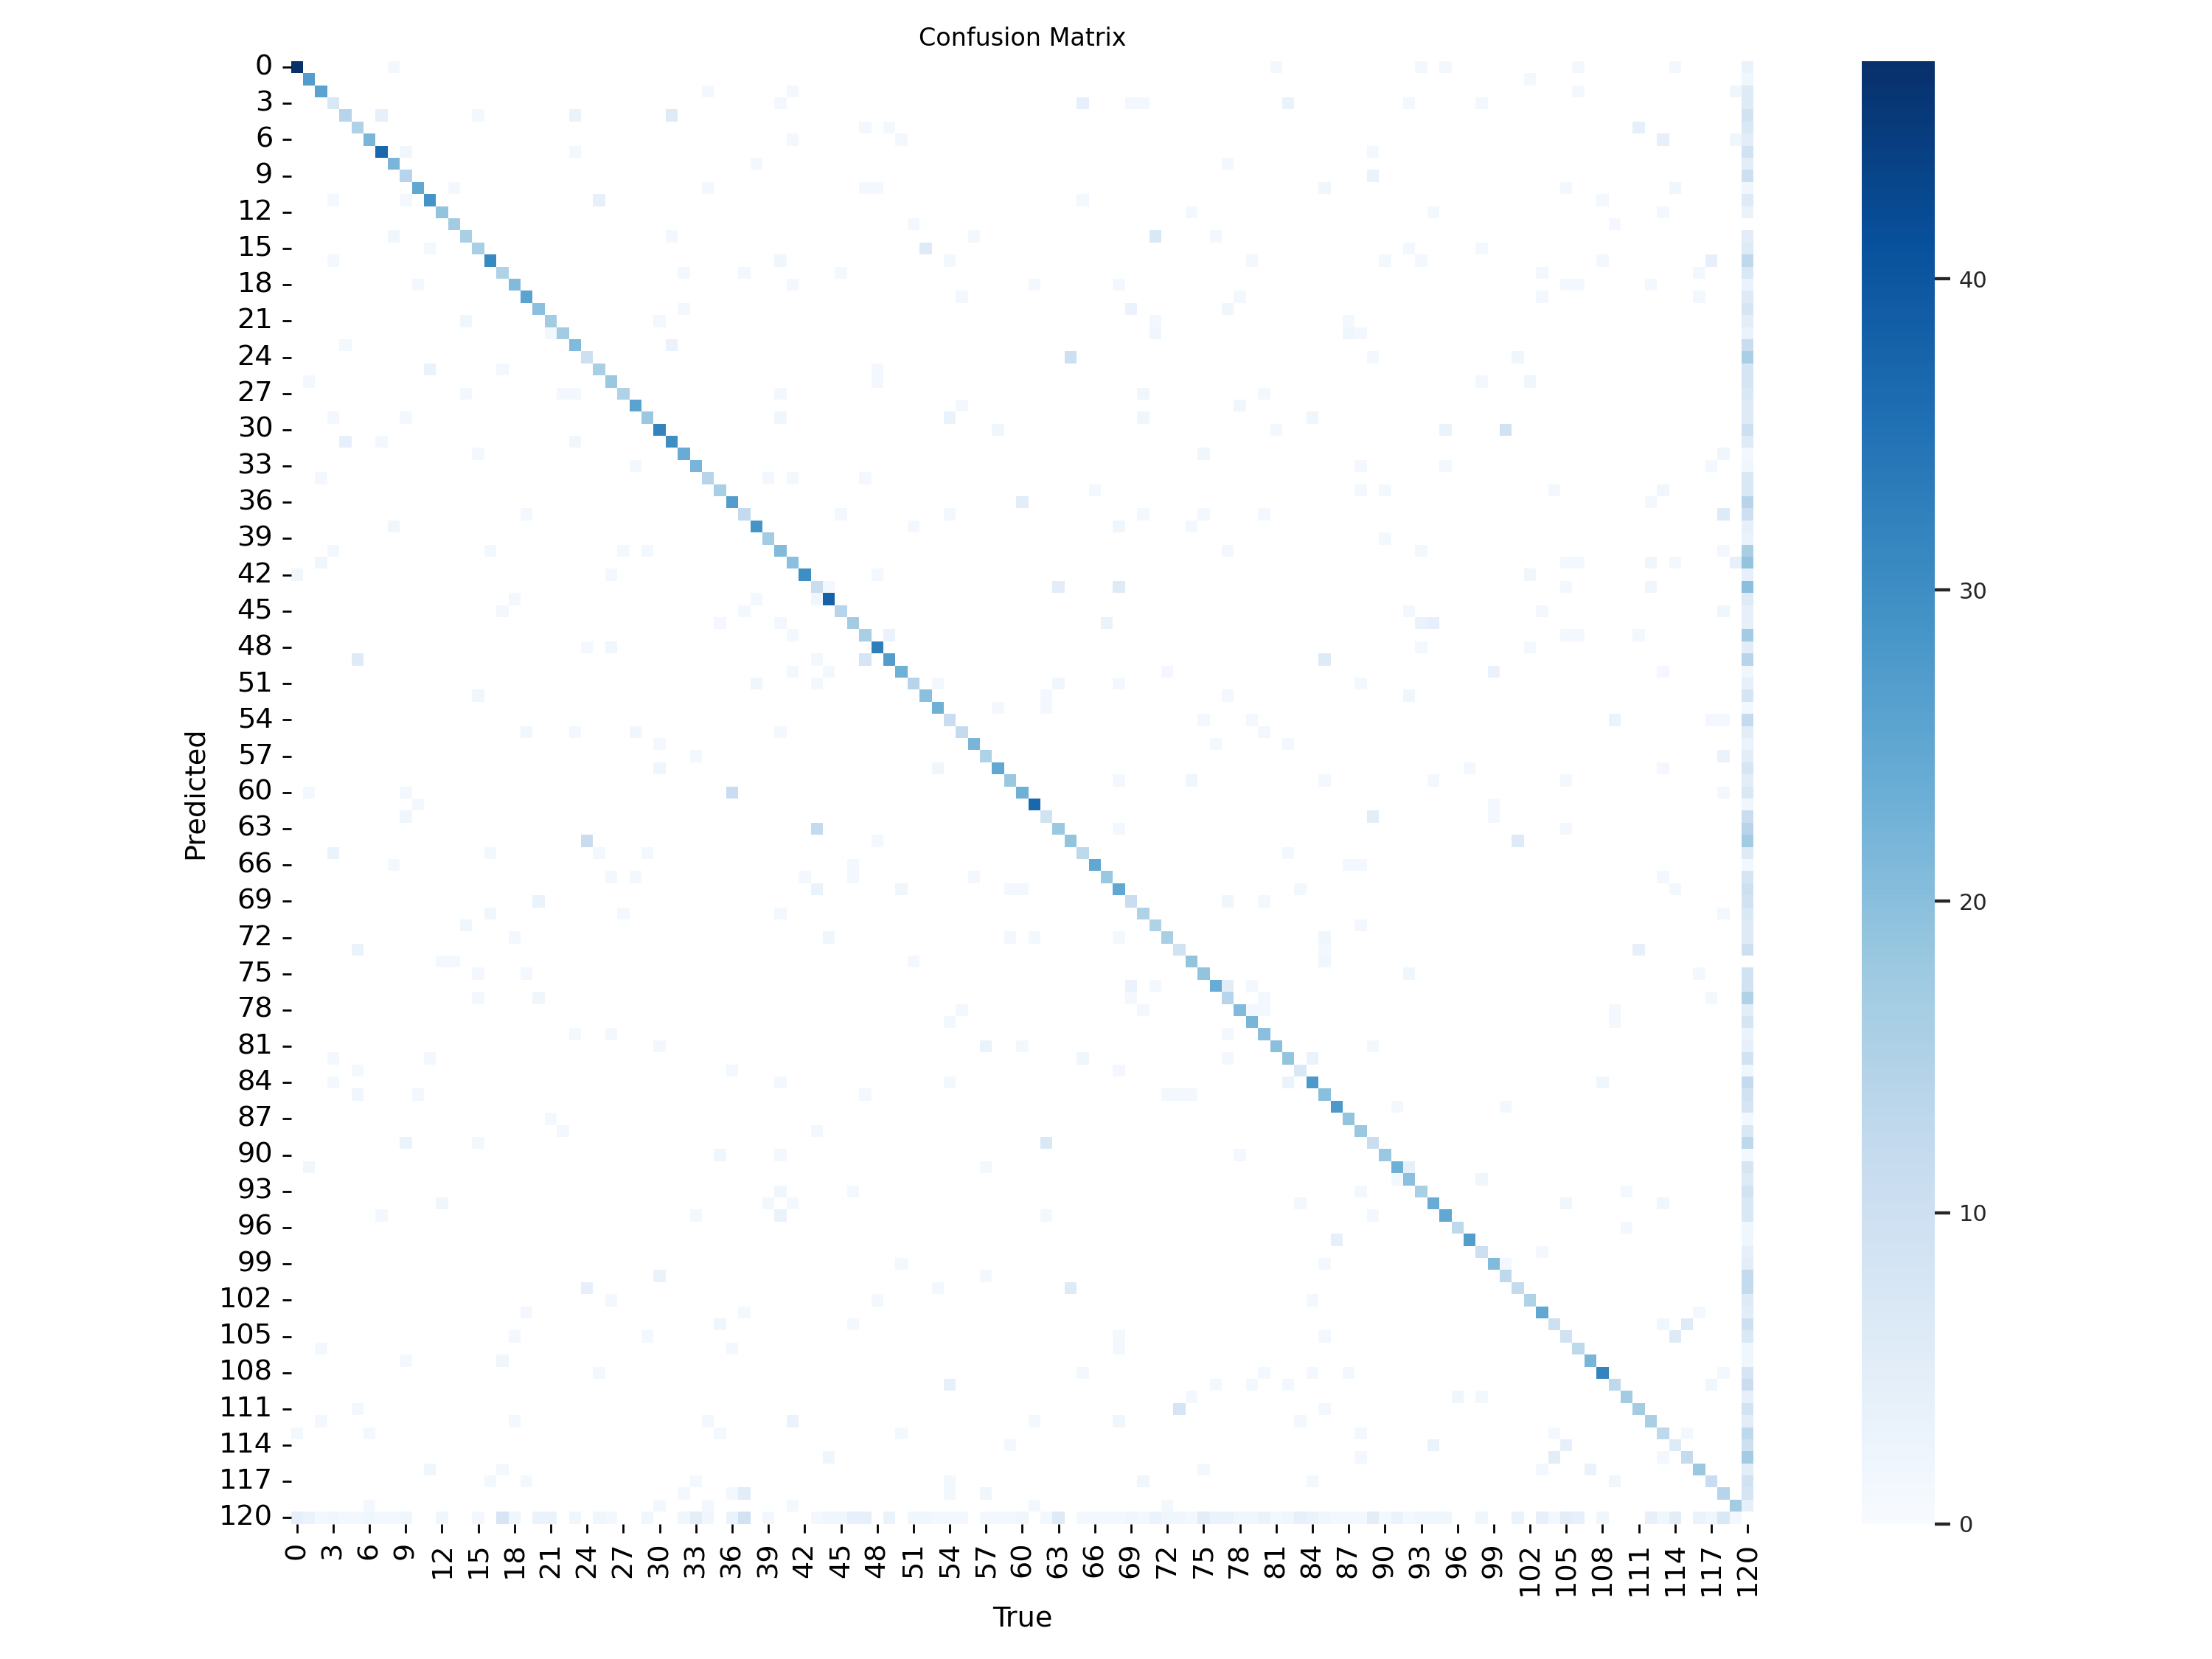

In [14]:
Image.open(str(train_dir)+'confusion_matrix.png')

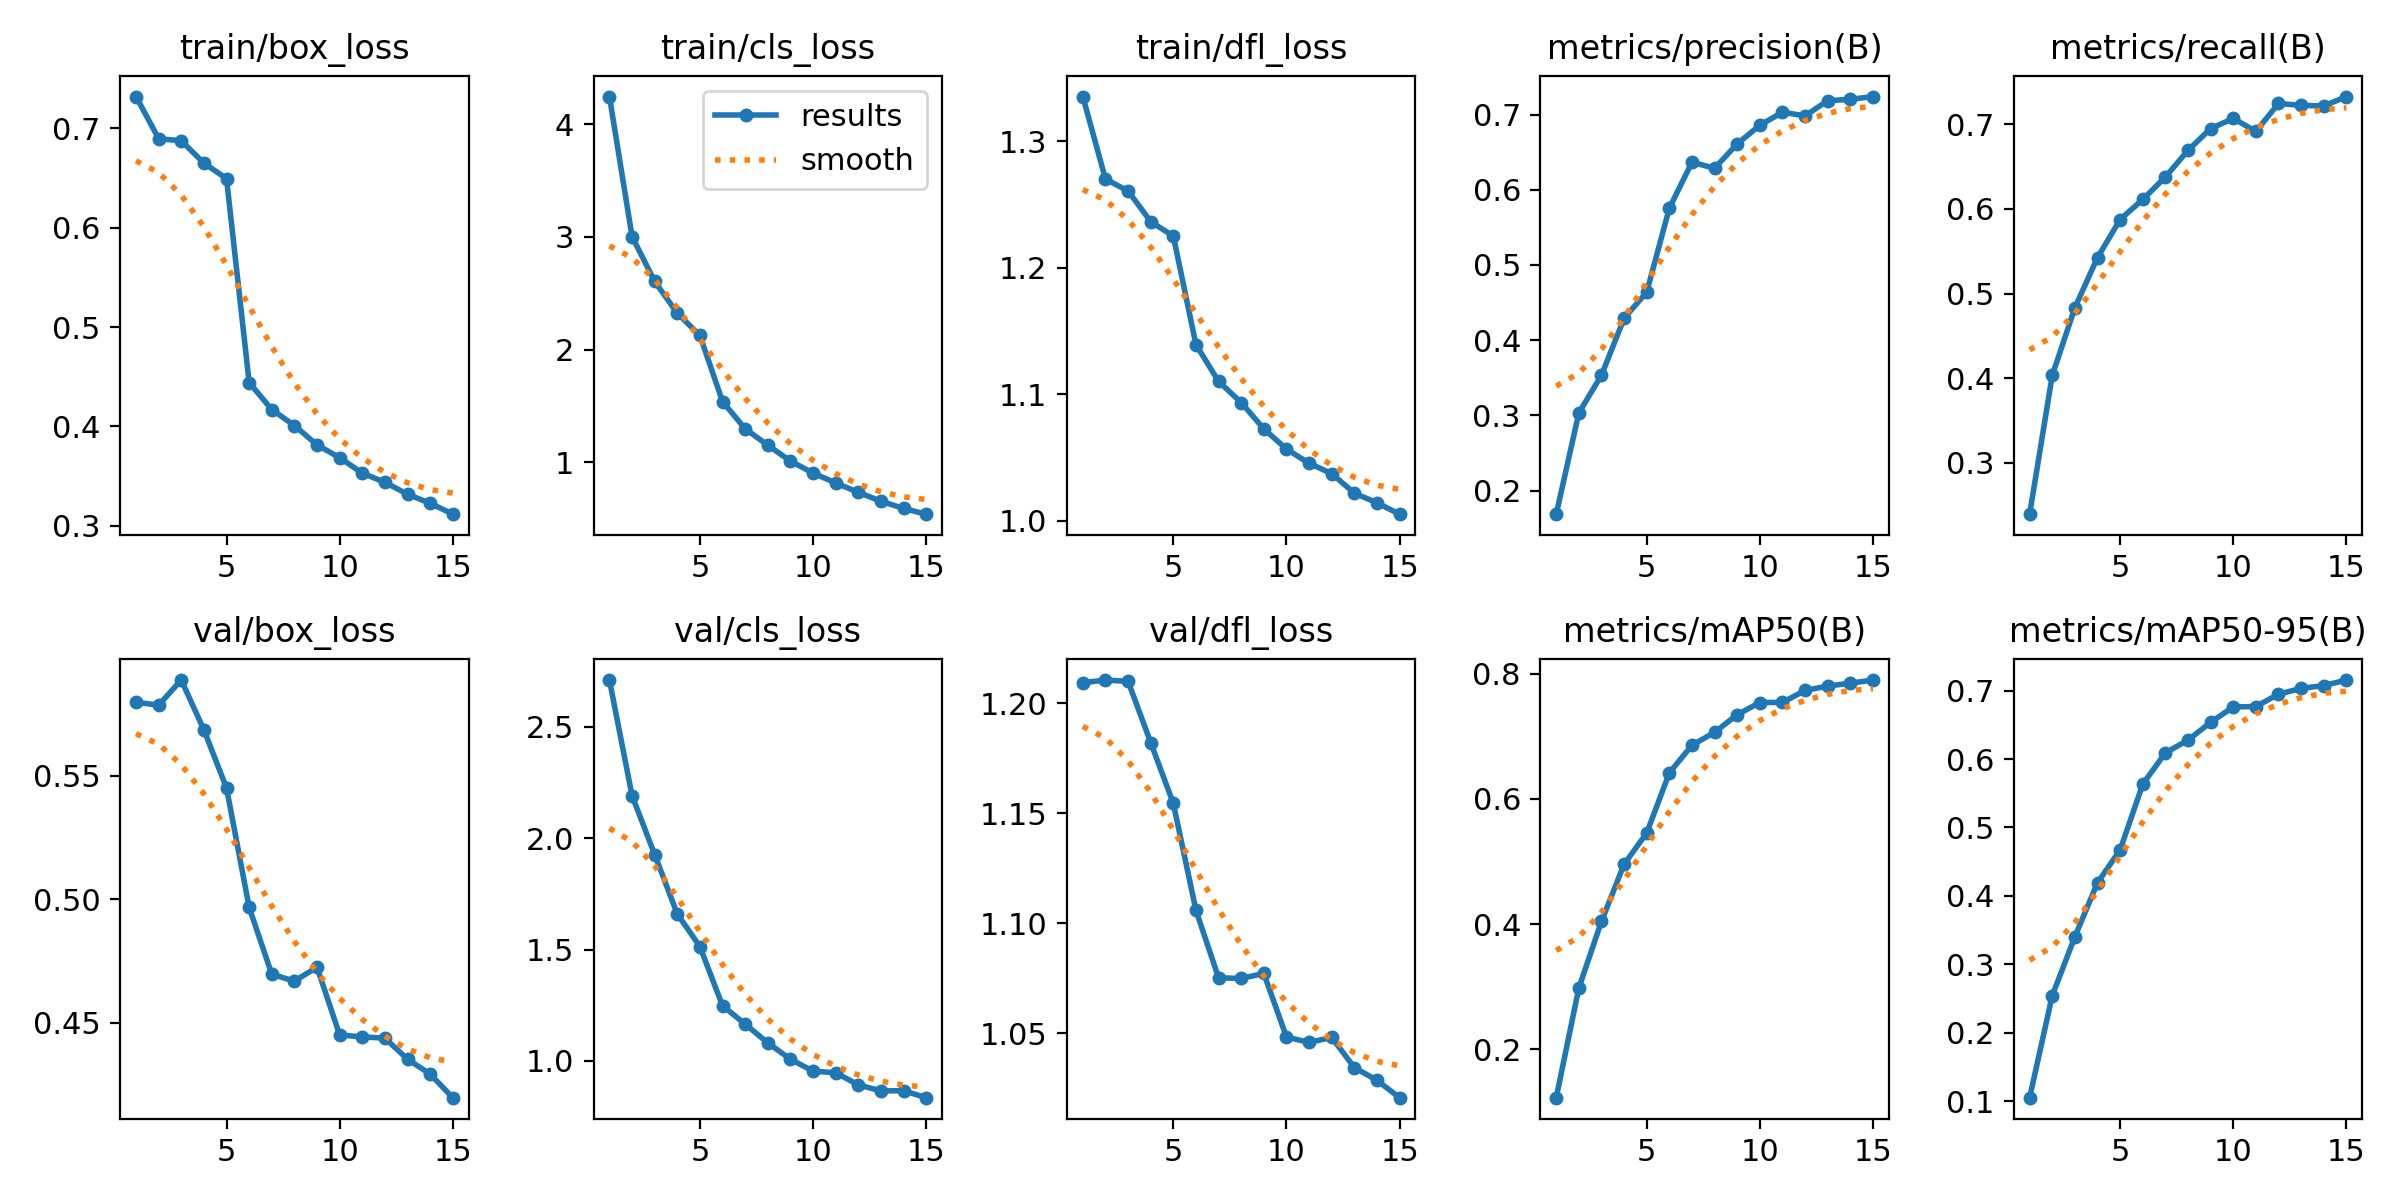

In [15]:
Image.open(str(train_dir)+'results.png')

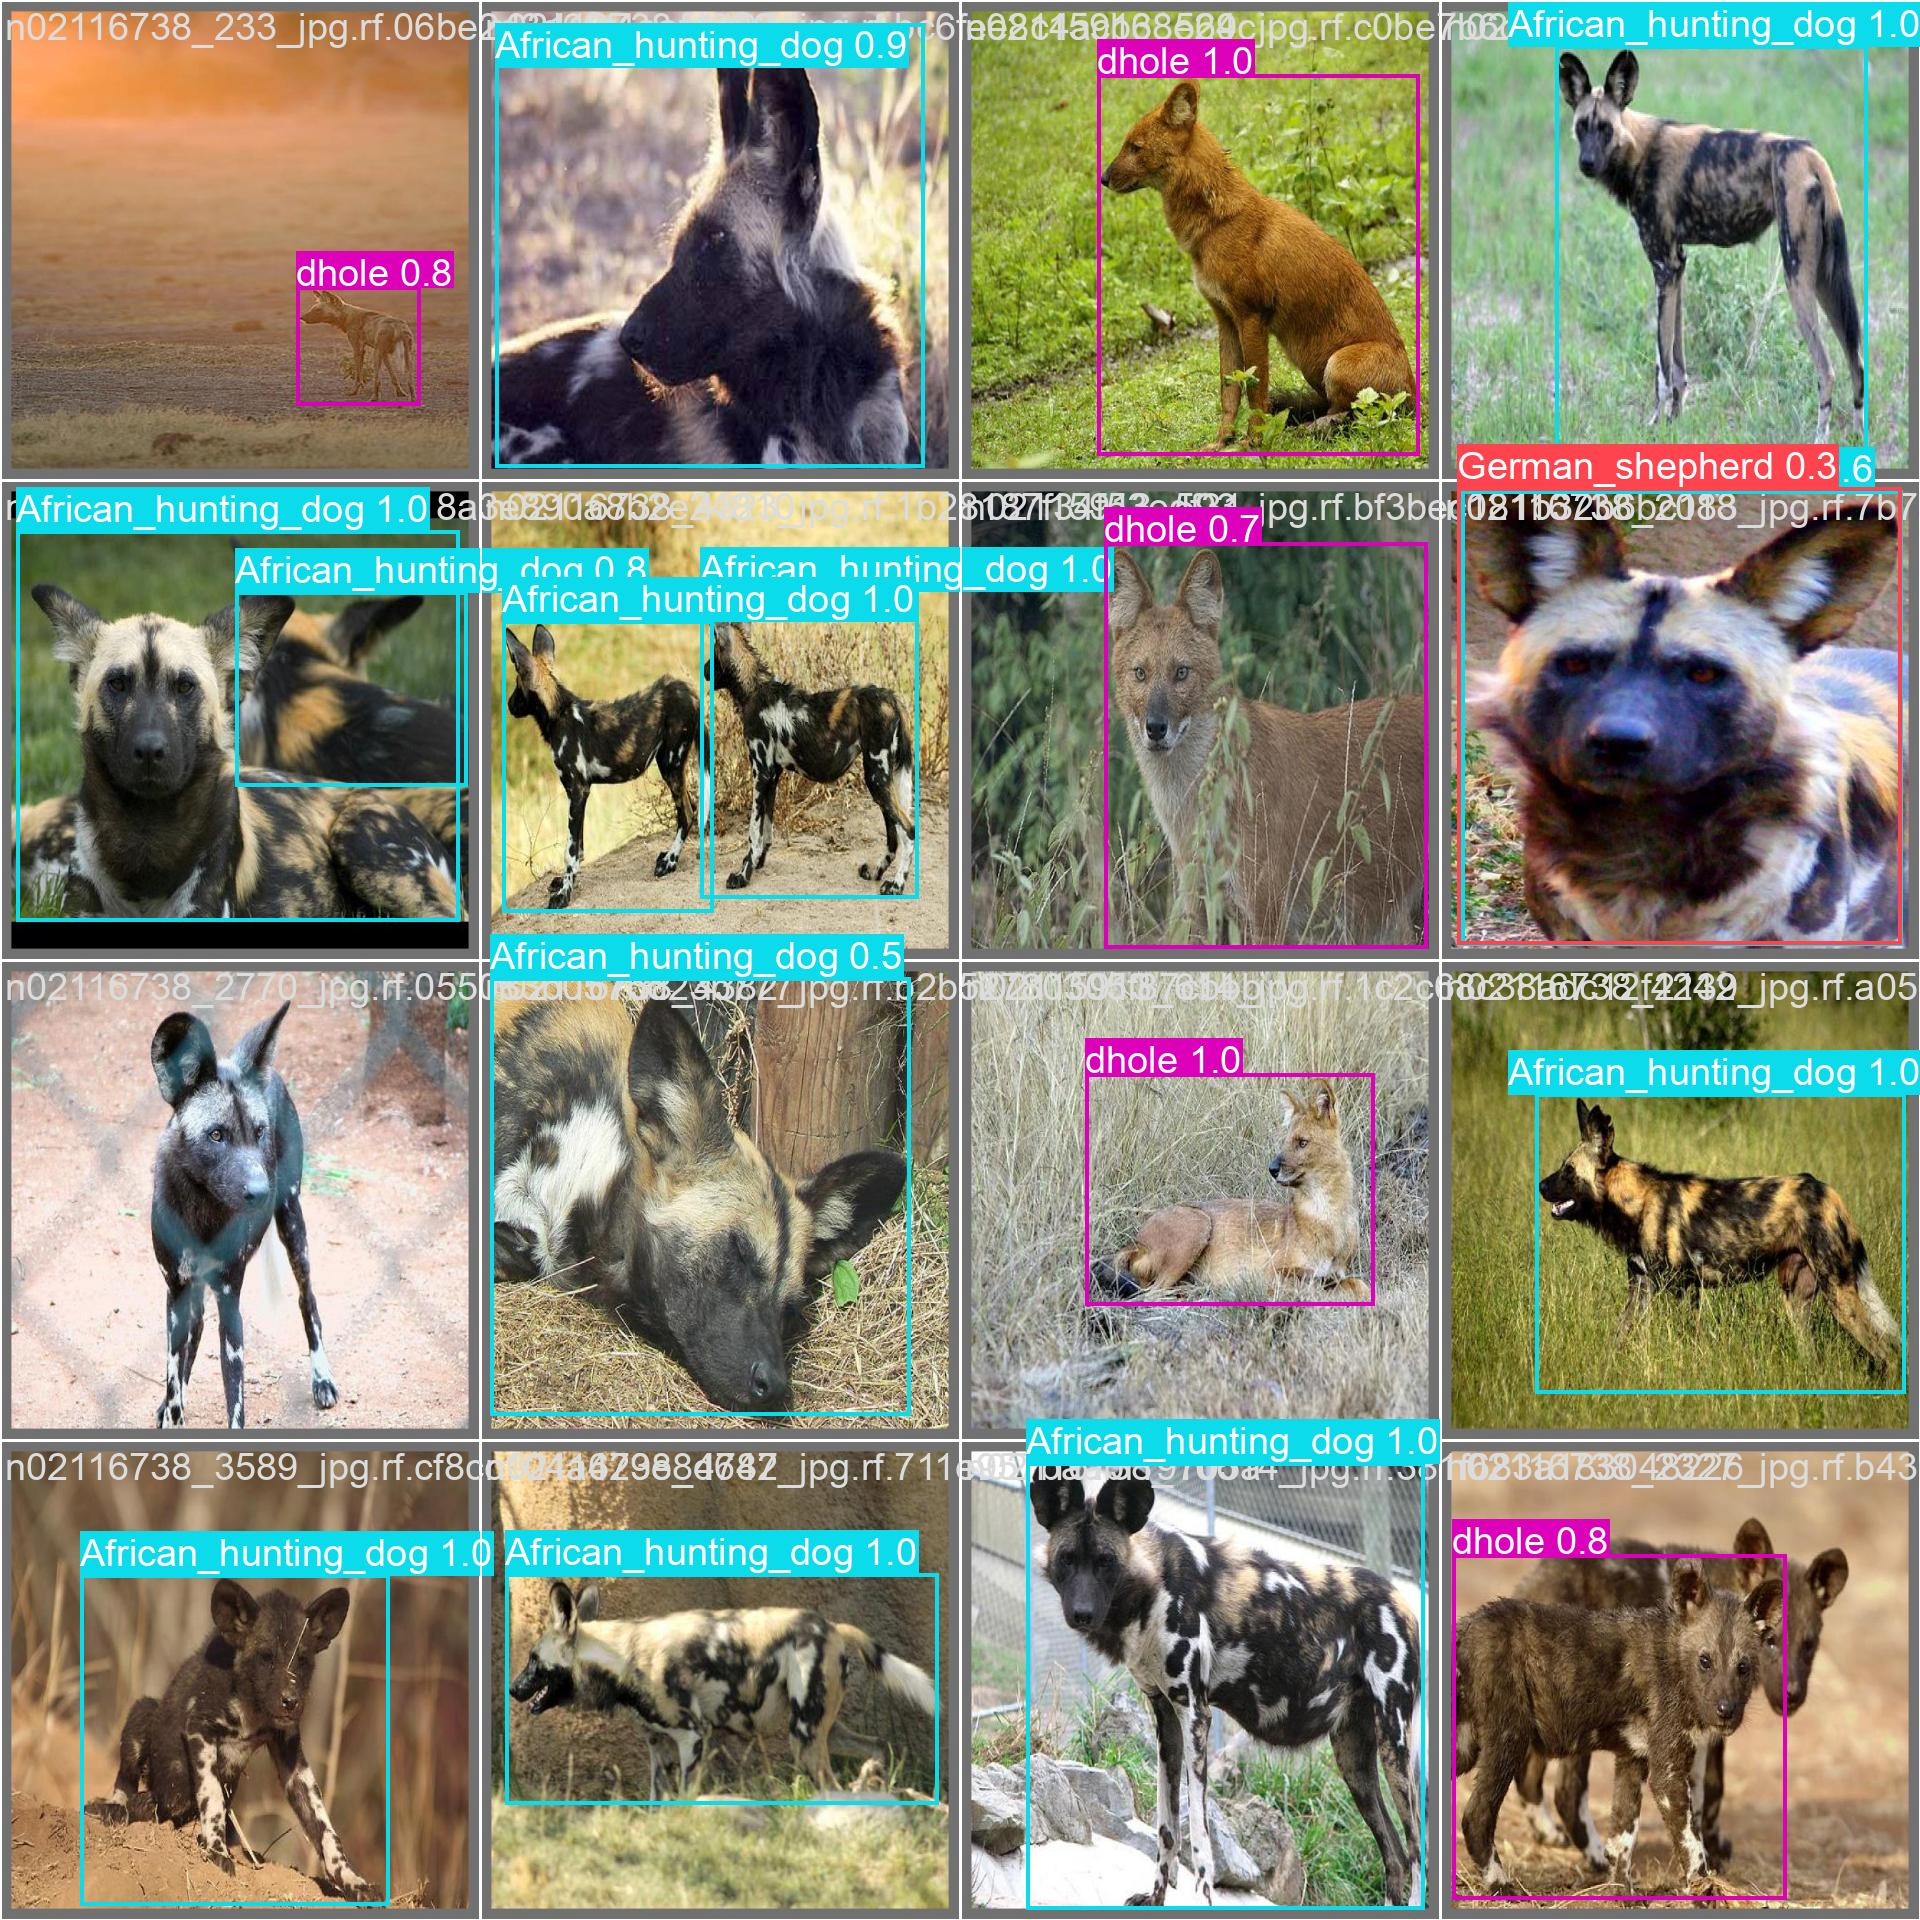

In [17]:
Image.open(str(train_dir)+'val_batch0_pred.jpg')

In [19]:
!yolo task=detect mode=val model={train_dir+'weights/best.pt'} data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25909240 parameters, 0 gradients, 79.1 GFLOPs
val: Scanning /content/Stanford-Dogs-Dataset-dog-breed-1/valid/labels.cache... 3086 images, 0 backgrounds, 0 corrupt: 100% 3086/3086 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 193/193 [01:25<00:00,  2.25it/s]
                   all       3086       3328      0.725      0.732       0.79      0.715
          Afghan_hound         38         54      0.921      0.852      0.964      0.908
   African_hunting_dog         27         34      0.958      0.853      0.962       0.81
              Airedale         30         32      0.849      0.812      0.907       0.85
American_Staffordshire_terrier         18         18      0.509        0.5      0.501      0.425
           Appenzeller         17         20      0.465        0.7      0.657      0.525
    Australi

In [ ]:
!unzip /content/犬１-20240617T025624Z-001.zip
!rm /content/犬１-20240617T025624Z-001.zip

In [ ]:
!unzip /content/犬２-20240617T025639Z-001.zip
!rm /content/犬２-20240617T025639Z-001.zip

In [21]:
!yolo task=detect mode=predict model={train_dir+'weights/best.pt'} conf=0.25 source=/content/犬１ save=True

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25909240 parameters, 0 gradients, 79.1 GFLOPs

image 1/20 /content/犬１/IMG_0606.JPG: 480x640 1 Chihuahua, 1 papillon, 110.4ms
image 2/20 /content/犬１/IMG_0614.JPG: 480x640 1 Chihuahua, 1 papillon, 28.3ms
image 3/20 /content/犬１/IMG_1796.JPG: 480x640 2 papillons, 28.2ms
image 4/20 /content/犬１/IMG_2387.JPG: 480x640 2 papillons, 28.2ms
image 5/20 /content/犬１/IMG_2392.JPG: 640x640 1 papillon, 38.0ms
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 6/20 /content/犬１/IMG_2516.JPG: 640x480 1 papillon, 75.9ms
image 7/20 /content/犬１/IMG_2519.JPG: 640x480 1 Chihuahua, 28.

In [32]:
!yolo task=detect mode=predict model={train_dir+'weights/best.pt'} conf=0.25 source=/content/犬２ save=True

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25909240 parameters, 0 gradients, 79.1 GFLOPs

image 1/55 /content/犬２/IMG_6859.JPG: 480x640 2 Newfoundlands, 85.1ms
image 2/55 /content/犬２/IMG_6860.JPG: 384x640 1 miniature_poodle, 122.6ms
image 3/55 /content/犬２/IMG_6861.JPG: 384x640 1 standard_poodle, 25.3ms
image 4/55 /content/犬２/IMG_6862.JPG: 480x640 1 toy_poodle, 29.1ms
image 5/55 /content/犬２/IMG_6863.JPG: 480x640 1 miniature_poodle, 28.3ms
image 6/55 /content/犬２/IMG_6864.JPG: 352x640 (no detections), 124.0ms
image 7/55 /content/犬２/IMG_6865.JPG: 480x640 1 Newfoundland, 27.9ms
image 8/55 /content/犬２/IMG_6866.JPG: 480x640 (no detections), 27.1ms
image 9/55 /content/犬２/IMG_6867.JPG: 480x640 1 soft-coated_wheaten_terrier, 27.0ms
image 10/55 /content/犬２/IMG_6868.JPG: 480x640 1 toy_poodle, 26.5ms
image 11/55 /content/犬２/IMG_6869.JPG: 480x640 1 Shih-Tzu, 1 soft-coated_wheaten_terrier, 26.5ms
image 12/55 /content/犬２/IMG

In [23]:
from glob import glob

for image_path in glob('/content/runs/detect/predict/*')[:3]:
      Image.open(image_path)
      print("\n")

In [25]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

In [27]:
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
    }
  media = MediaFileUpload(path, mimetype='application/octet-stream',resumable=True)

  created = drive_service.files().create(body=file_metadata,media_body=media,fields='id').execute()

  print('File ID: {}'.format(created.get('id')))

  return created

In [28]:
save_file_to_drive('yolov8-dog-breed-weights.pt', train_dir+'weights/best.pt')

File ID: 1o1yGQdHXOVCY7wEWmI0JYGE4F5iV_3pf


{'id': '1o1yGQdHXOVCY7wEWmI0JYGE4F5iV_3pf'}

In [37]:
from google.oauth2 import service_account
from googleapiclient.discovery import build
import os

In [40]:
def upload_directory(directory_path, parent_folder_id=None):
    folder_metadata = {
        'name': os.path.basename(directory_path),
        'mimeType': 'application/vnd.google-apps.folder'
    }
    if parent_folder_id:
        folder_metadata['parents'] = [parent_folder_id]

    folder = drive_service.files().create(body=folder_metadata, fields='id').execute()
    folder_id = folder.get('id')

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            file_metadata = {
                'name': filename,
                'parents': [folder_id]
            }
            media = {'body': open(file_path, 'rb')}
            service.files().create(body=file_metadata, media_body=media).execute()

    print(f'Uploaded {directory_path} to Google Drive.')

In [41]:
upload_directory('/content/runs/detect')

Uploaded /content/runs/detect to Google Drive.
